Initial Queue of Colors:
deque(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
(501000,)
max e(rr region:  0.36165452 0.5351603 0.7583804 0.22599998
max err 1.0111151
mean err 0.00021490514336619526
a 1000
(501000,)
Erro medio 0.36009170539677143  erro max 0.4897346
0.5355729 0.7591822 0.36143836
0.44939357
0.53553754 0.7594288 0.36147642
0.4066138
0.53536063 0.7590775 0.36151838
0.4139638
0.5355518 0.7590198 0.36173293
0.48507348
0.5351617 0.7587182 0.36178443
0.42845193
0.53578895 0.75971234 0.36176974
0.44504103
0.53559417 0.75918657 0.36146265
0.45576966
0.53526205 0.7589855 0.36169222
0.41099623
0.5353345 0.75853276 0.36163044
0.48014835
0.53551096 0.7588015 0.36145222
0.48896894
0.5354403 0.7586418 0.3612843
0.48773247
0.53539735 0.75874406 0.36183318
0.48934427
0.53523105 0.7588061 0.36165386
0.4267742
0.5354167 0.75882816 0.36174282
0.47847572
0.5356156 0.75921786 0.36144534
0.4558626
0.5356442 0.7592474 0.3612471


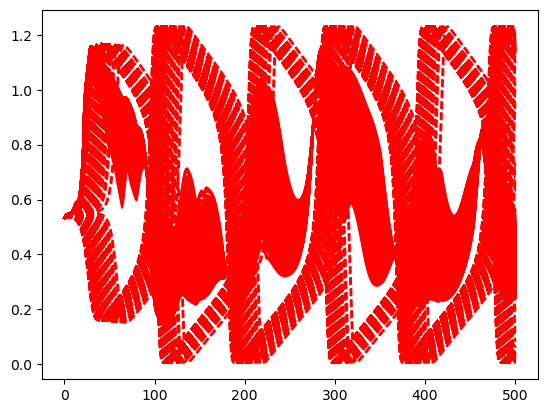

351


/tmp/ipykernel_7735/954721573.py:115: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10  # Increase the distance of the plot from the viewer for a "zoomed out" effect


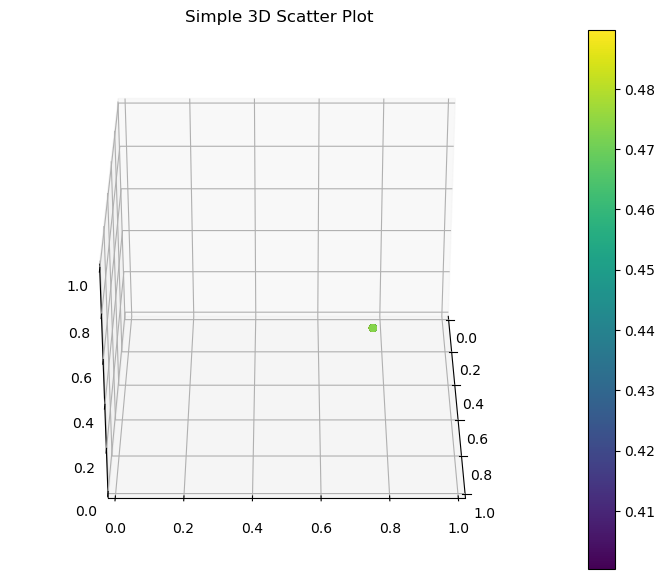

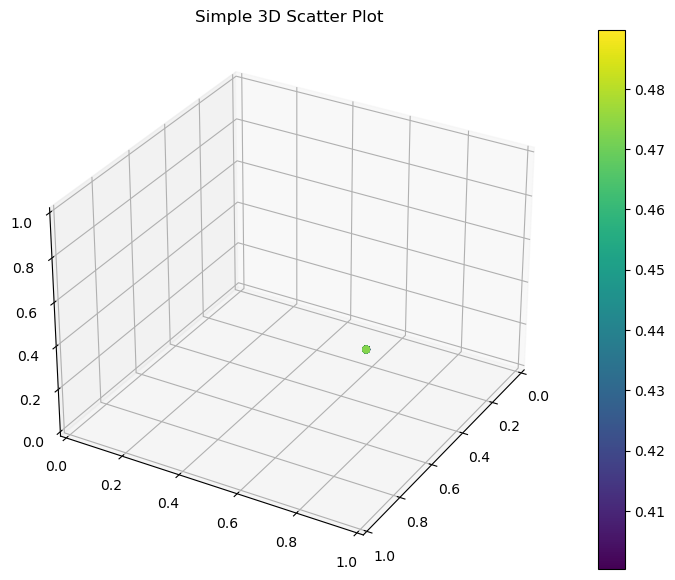

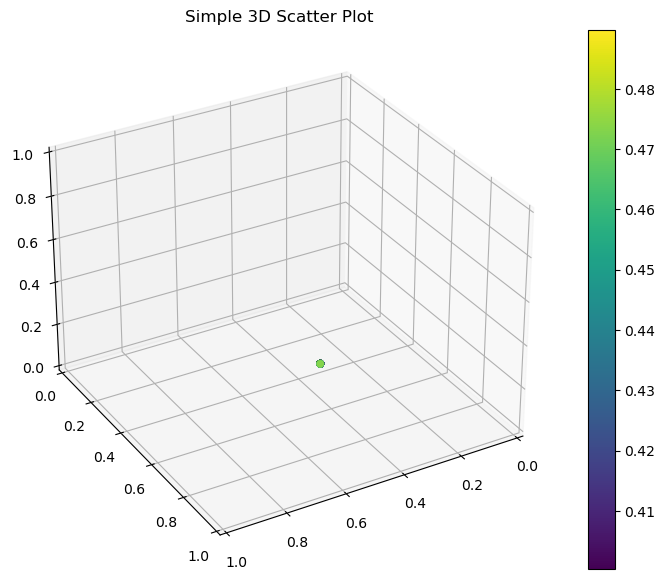

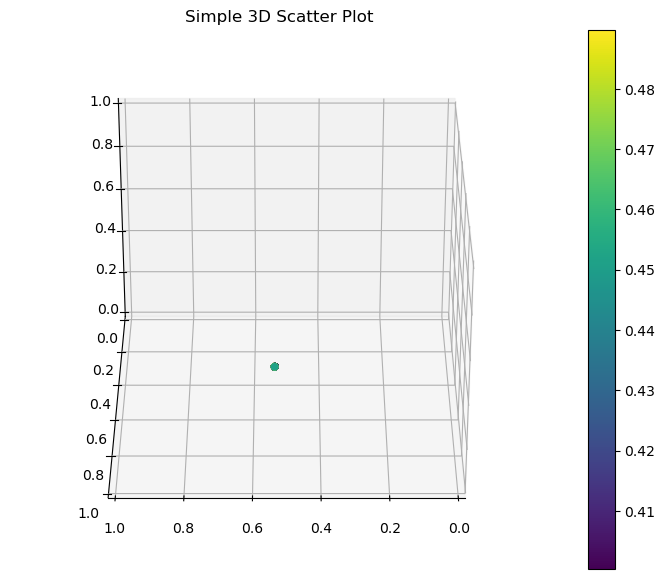

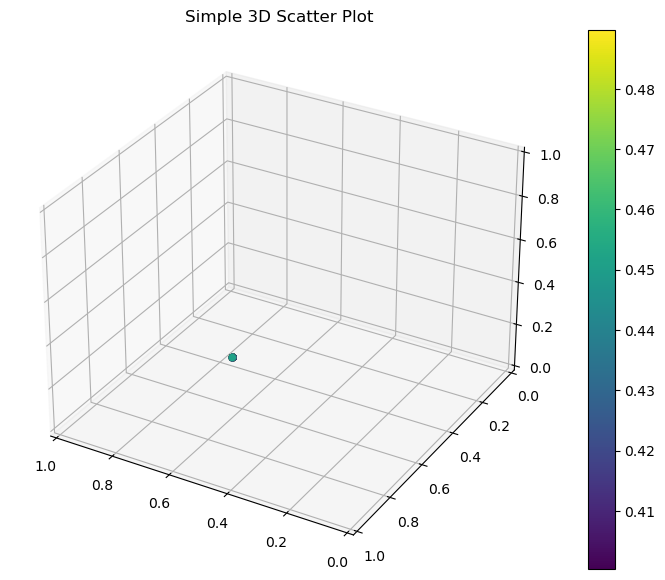

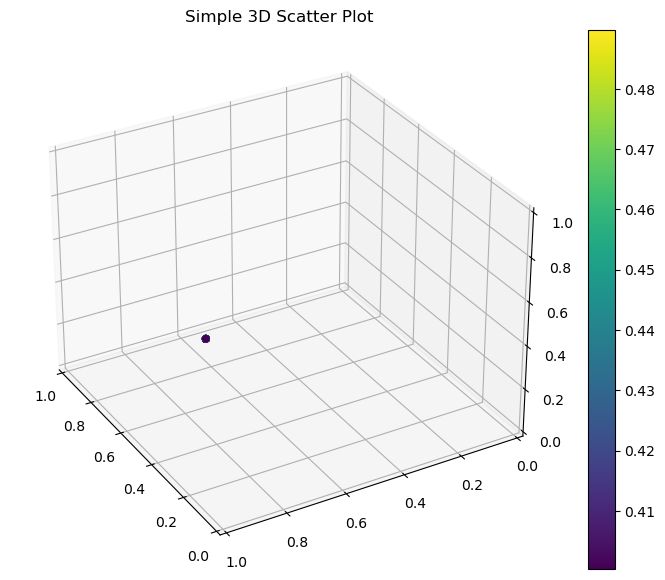

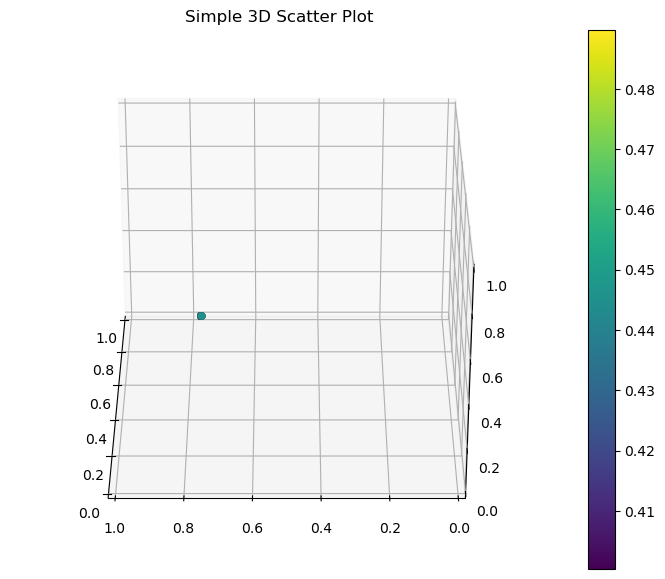

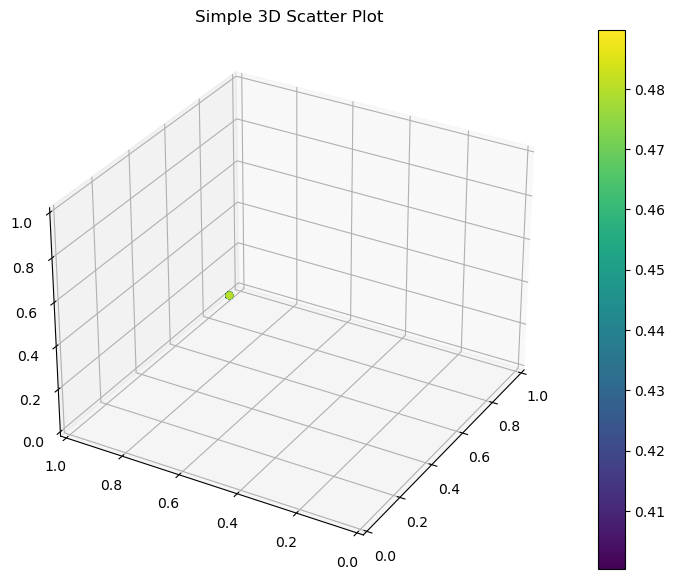

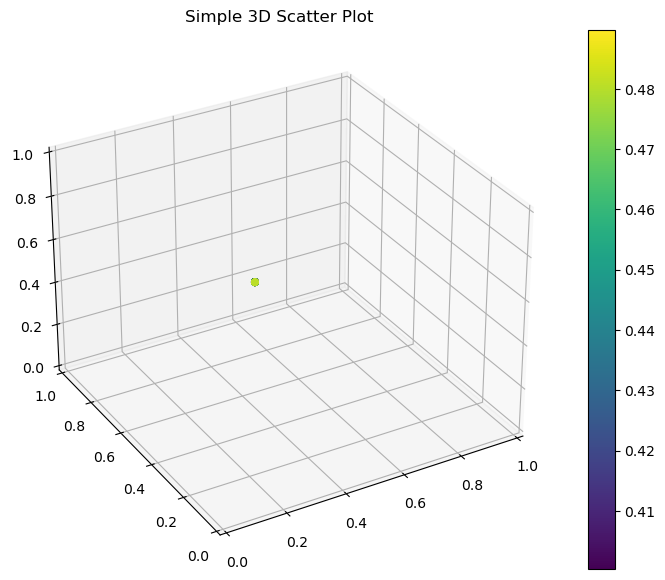

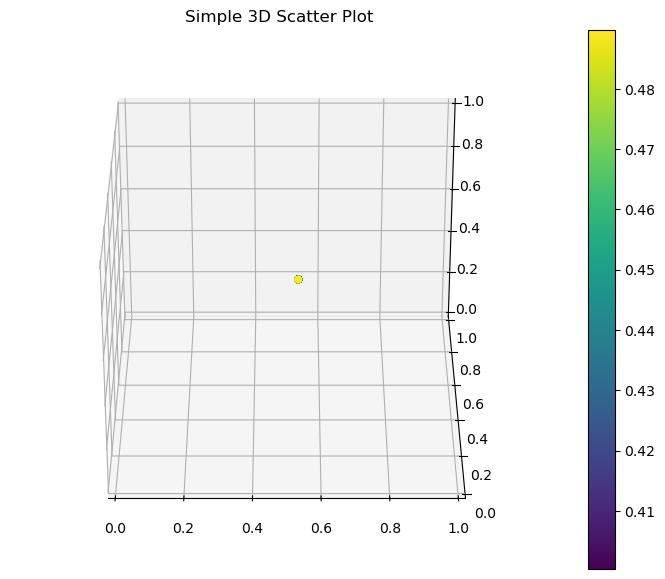

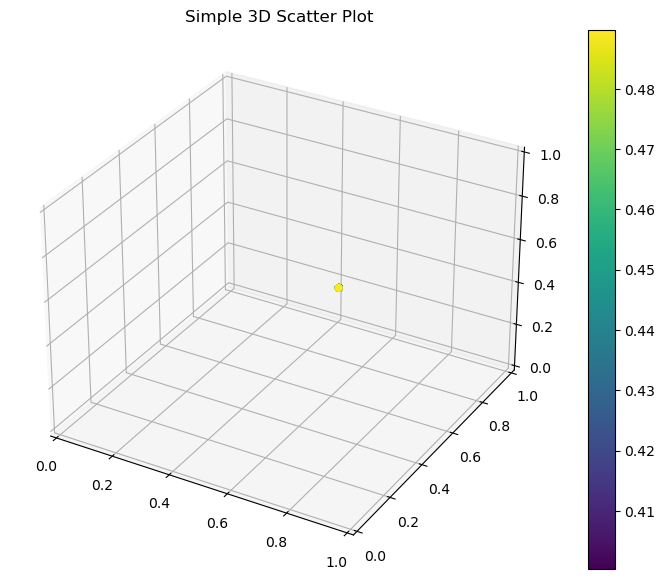

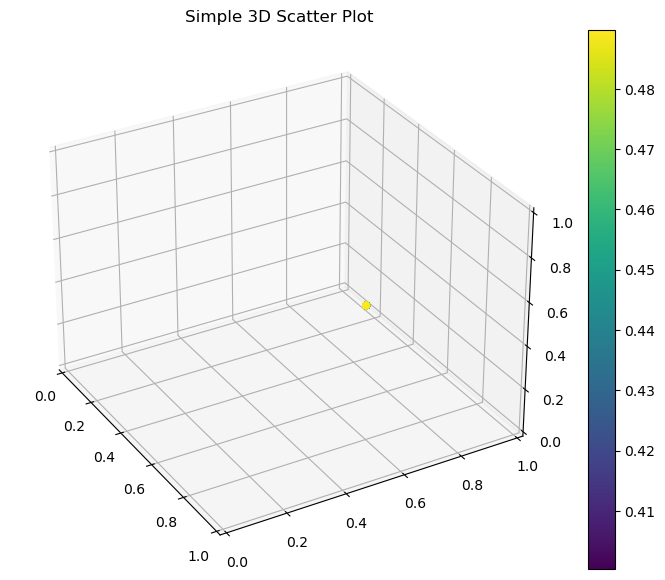

In [26]:
import operator
import h5py
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

# Create a deque of default colors
colors = deque(plt.rcParams['axes.prop_cycle'].by_key()['color'])

def resetColors():
    colors = deque(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Display the initial queue of colors
print("Initial Queue of Colors:")
print(colors)

file_path = "trainer/"
with h5py.File(file_path+"valcrit.h5", 'r') as hf:
        T,U,V,K = np.array(hf['input']).T
        TX,TW = np.array(hf['target']).T
        X,W    =np.array(hf['pred']).T
        





    
    
E= ((X-TX)**2)**0.5

print(np.shape(E))
import operator

ae,m= max(enumerate(E), key=operator.itemgetter(1))
print("max e(rr region: ",K[ae],U[ae],V[ae],T[ae])
print("max err",(np.max( ((X-TX)**2)**0.5) ))
print("mean err",(np.mean(X-TX)**2)**0.5)

e=lambda x:np.expand_dims(x,axis=1)


nc=len(U)//len(np.unique(T))

print("a",nc)
d=0
print(np.shape(X))

pred_u= np.reshape(X, (nc,len(X)//nc))
true_u= np.reshape(TX, (nc,len(X)//nc))

ks,us,vs=np.reshape(K, (nc,len(X)//nc)),np.reshape(U, (nc,len(X)//nc)),np.reshape(V, (nc,len(X)//nc))

XU,YV,ZK,CE=[],[],[],[]
resetColors()
e_total=0
e_max=0
for i in range(0,nc):
    e=np.mean(np.abs(true_u[i]-pred_u[i]))
    if(e>e_max):
        e_max=e
    e_total=e_total+e

print("Erro medio",e_total/nc," erro max",e_max)
    

for i in range(0,nc):
    e=np.mean(np.abs(true_u[i]-pred_u[i]))
    if(e>.2):
        #c=colors.pop()
        c="red"
        plt.plot(pred_u[i],color=c)
        plt.plot(true_u[i],"--",color=c)
        #plt.plot(np.abs(true_u[i]-pred_u[i]),"-o",color=c)

    
    if(e>=0.4):
        print(us[i][0],vs[i][0],ks[i][0])
        print(e)
        CE.append(e)
        XU.append(us[i][0])
        YV.append(vs[i][0])
        ZK.append(ks[i][0])

plt.show()

from mpl_toolkits.mplot3d.proj3d import proj_transform



# Separate the coordinates and color values
x, y, z=XU,YV,ZK
print(len(x))
with open("data.txt", "w") as file:
    for i in range(len(x)):
        file.write(f"{x[i]}, {y[i]}, {z[i]}\n")
        
        

for angle in range(0, 360, 30):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Creating the scatter plot
    img = ax.scatter(XU, YV, ZK, c=CE,cmap='viridis')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    plt.title("Simple 3D Scatter Plot")
    fig.colorbar(img)
    
 

    ax.view_init(elev=30, azim=angle)
    ax.dist = 10  # Increase the distance of the plot from the viewer for a "zoomed out" effect

    plt.show()

    